<h1>Predicting high BP</h1>

<script>
alert("Playing with fire");
</script>

In [1]:
import pandas as pd
import csv as csv
import numpy as np

df = pd.read_csv('data.csv', skipinitialspace=True, header=None, sep=' ')

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,.,1,268,0,NaN
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,.,1,160,0,NaN
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0,NaN
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,.,1,225,0,NaN
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0,NaN


<h3>Deleting the weird empty column</h3>

In [3]:
del(df[16])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,.,1,268,0
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,.,1,160,0
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,.,1,225,0
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0


<h3>Adding proper column names</h3>

In [5]:
column_names = ['id', 'pseudo_psu', 'pseudo_stratum', 'stat_weight', 'age', 'sex', 'race', 
                'body_weight', 'height', 'avg_systolic_bp', 'avg_diastolic_bp', 'smoked_alot', 
                'currently_smokes', 'smoking', 'serum_cholesterol', 'hbp']
df.columns = column_names

In [6]:
df.head()

,id,pseudo_psu,pseudo_stratum,stat_weight,age,sex,race,body_weight,height,avg_systolic_bp,avg_diastolic_bp,smoked_alot,currently_smokes,smoking,serum_cholesterol,hbp
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,.,1,268,0
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,.,1,160,0
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,.,1,225,0
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0


<h3>The last sample is strange</h3>

In [7]:
df.drop(df.index[-1], inplace=True)

<h3>Convert to numeric, convert all '.' to nan automagically</h3>

In [8]:
df = df.apply(pd.to_numeric, args=('coerce',))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17030 entries, 0 to 17029
Data columns (total 16 columns):
id                   17030 non-null int64
pseudo_psu           17030 non-null int64
pseudo_stratum       17030 non-null int64
stat_weight          17030 non-null float64
age                  17030 non-null int64
sex                  17030 non-null int64
race                 17025 non-null float64
body_weight          16976 non-null float64
height               16991 non-null float64
avg_systolic_bp      16538 non-null float64
avg_diastolic_bp     16536 non-null float64
smoked_alot          17030 non-null int64
currently_smokes     8626 non-null float64
smoking              17029 non-null float64
serum_cholesterol    16062 non-null float64
hbp                  17030 non-null int64
dtypes: float64(9), int64(7)
memory usage: 2.2 MB


<h3>Take a look at  some values</h3>

In [10]:
for column in df:
    print(column + ': ')
    print(np.unique(df[column].values))

id: 
[    3     4     9 ..., 53593 53594 53616]
pseudo_psu: 
[1 2]
pseudo_stratum: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
stat_weight: 
[    225.93     225.95     231.02 ...,  131094.3   135251.6   139744.9 ]
age: 
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
sex: 
[0 1]
race: 
[  1.   2.   3.  nan  nan  nan  nan  nan]
body_weight: 
[ 48.   65.6  68.7 ...,   nan   nan   nan]
height: 
[ 46.7  50.   51.4  51.9  52.1  52.4  53.5  53.6  53.7  53.8  53.9  54.1
  54.2  54.3  54.4  54.5  54.6  54.8  54.9  55.   55.1  55.2  55.3  55.4
  55.5  55.6  55.7  55.8  55.9  56.   56.1  56.2  56.3  56.4  56.5  56.6
  56.7  56.8  56.9  57.   57.1  57.2  57.3  57.4  57.5  57.6  57.7  57.8
  57.9  58.   58.1  58.2  58.3  58.4 

<h3>How many nulls do we have?</h3>

In [11]:
for column in df:
    print(column + ': ')
    print(df[column].isnull().sum())

id: 
0
pseudo_psu: 
0
pseudo_stratum: 
0
stat_weight: 
0
age: 
0
sex: 
0
race: 
5
body_weight: 
54
height: 
39
avg_systolic_bp: 
492
avg_diastolic_bp: 
494
smoked_alot: 
0
currently_smokes: 
8404
smoking: 
1
serum_cholesterol: 
968
hbp: 
0


<h3>Use Machine learning to replace weight</h3>

<h4>Check to see if using age, sex, height, race, sys, dia, smoking and cholesterol to predict weight is feasible</h4>

Select the samples whose columns in these rows are not null (will use them for prediction)

In [12]:
missing = ((~df['race'].isnull())&(~df['height'].isnull())&(~df['avg_systolic_bp'].isnull())&(~df['avg_diastolic_bp'].isnull())
           &(~df['smoking'].isnull())&(~df['serum_cholesterol'].isnull())&(~df['age'].isnull())&(~df['sex'].isnull()))

In [13]:
data = df[missing][~df['body_weight'].isnull()]

C:\Users\vincent\Anaconda2\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [14]:
data.head()

,id,pseudo_psu,pseudo_stratum,stat_weight,age,sex,race,body_weight,height,avg_systolic_bp,avg_diastolic_bp,smoked_alot,currently_smokes,smoking,serum_cholesterol,hbp
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,NaN,1,268,0
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,NaN,1,160,0
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,NaN,1,225,0
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0


In [15]:
total_data = data[['race', 'age', 'sex', 'height', 'avg_systolic_bp', 'avg_diastolic_bp', 'smoking', 'serum_cholesterol',
                   'body_weight']].values

In [16]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.265485475668


Eh, good enough

In [18]:
replace = df[missing][df['body_weight'].isnull()][['race', 'age', 'sex', 'height', 'avg_systolic_bp', 'avg_diastolic_bp', 'smoking', 
                                                    'serum_cholesterol']].values

In [19]:
new_values = regr.predict(replace)

In [20]:
new_values

array([ 177.56327019,  134.98366574,  135.43111565,  141.69859908,
        128.90421092,  164.49471124,  135.85407016,  141.50414881,
        137.54760733,  154.56226225,  147.48031255,  106.68448785,
        132.13075337,  119.71313143,  165.7659623 ,  153.74597875,
        171.19165832])

Replace nan with predicted values

In [21]:
for idx, val in enumerate(df[missing][df['body_weight'].isnull()].index):
    df.loc[val, 'body_weight'] = new_values[idx]

Predict the final weight values using age, race, sex

In [22]:
missing = ((~df['race'].isnull())&(~df['age'].isnull())&(~df['sex'].isnull()))

In [23]:
data = df[missing][~df['body_weight'].isnull()]

In [24]:
total_data = data[['race', 'age', 'sex', 'hbp', 'body_weight']].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
replace = df[missing][df['body_weight'].isnull()][['race', 'age', 'sex', 'hbp']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[missing][df['body_weight'].isnull()].index):
    df.loc[val, 'body_weight'] = new_values[idx]

<h3>Use age, sex, race & weight to predict height</h3>

In [26]:
missing = ((~df['race'].isnull())&(~df['age'].isnull())&(~df['sex'].isnull())&(~df['body_weight'].isnull()))
data = df[missing][~df['height'].isnull()]
total_data = data[['race', 'age', 'sex', 'body_weight', 'height']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.546783482649


Much better than trying to predict weight

In [27]:
replace = df[missing][df['height'].isnull()][['race', 'age', 'sex', 'body_weight']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[missing][df['height'].isnull()].index):
    df.loc[val, 'height'] = new_values[idx]

<h3>Predict race</h3>

In [28]:
data = df[~df['race'].isnull()]
total_data = data[['age', 'sex', 'body_weight', 'height', 'smoking', 'race']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
replace = df[df['race'].isnull()][['age', 'sex', 'body_weight', 'height', 'smoking']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[df['race'].isnull()].index):
    df.loc[val, 'race'] = new_values[idx]

<h3>Predict if that one person currently smokes or not</h3>

In [29]:
data = df[~df['smoking'].isnull()]
total_data = data[['age', 'sex', 'body_weight', 'height', 'race', 'smoked_alot', 'smoking']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
y_pred  = gnb.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))



0.839857651246


Pretty good

In [30]:
replace = df[df['smoking'].isnull()][['age', 'sex', 'body_weight', 'height', 'race', 'smoked_alot']].values
new_values = gnb.predict(replace)
for idx, val in enumerate(df[df['smoking'].isnull()].index):
    df.loc[val, 'smoking'] = new_values[idx]

<h3>Predict cholesterol</h3>

In [31]:
data = df[~df['serum_cholesterol'].isnull()]
total_data = data[['age', 'sex', 'body_weight', 'height', 'smoking', 'race', 'serum_cholesterol']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
replace = df[df['serum_cholesterol'].isnull()][['age', 'sex', 'body_weight', 'height', 'smoking', 'race']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[df['serum_cholesterol'].isnull()].index):
    df.loc[val, 'serum_cholesterol'] = new_values[idx]

<h3>Predict systolic bp</h3>

In [32]:
data = df[~df['avg_systolic_bp'].isnull()]
total_data = data[['age', 'sex', 'body_weight', 'height', 'smoking', 'race', 'serum_cholesterol', 'avg_systolic_bp']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
replace = df[df['avg_systolic_bp'].isnull()][['age', 'sex', 'body_weight', 'height', 'smoking', 'race', 
                                                'serum_cholesterol']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[df['avg_systolic_bp'].isnull()].index):
    df.loc[val, 'avg_systolic_bp'] = new_values[idx]

<h3>Predict diastolic bp</h3>

In [33]:
data = df[~df['avg_diastolic_bp'].isnull()]
total_data = data[['age', 'sex', 'body_weight', 'height', 'smoking', 'race', 'serum_cholesterol', 'avg_systolic_bp', 
                  'avg_diastolic_bp']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:,:-1], total_data[:,-1], test_size=.33, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
replace = df[df['avg_diastolic_bp'].isnull()][['age', 'sex', 'body_weight', 'height', 'smoking', 'race', 
                                                'serum_cholesterol', 'avg_systolic_bp']].values
new_values = regr.predict(replace)
for idx, val in enumerate(df[df['avg_diastolic_bp'].isnull()].index):
    df.loc[val, 'avg_diastolic_bp'] = new_values[idx]

<h2>Feature Engineering</h2>

HBP is defined as diastolic bp being 90 or higher, not just systolic being 140 or higher

In [34]:
df['true_hbp'] = df['hbp']

In [35]:
df.loc[(df['hbp'] == 0)&(df['avg_diastolic_bp'] >= 90), 'true_hbp'] = 1

In [36]:
df.head()

,id,pseudo_psu,pseudo_stratum,stat_weight,age,sex,race,body_weight,height,avg_systolic_bp,avg_diastolic_bp,smoked_alot,currently_smokes,smoking,serum_cholesterol,hbp,true_hbp
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,NaN,1,268,0,0
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,NaN,1,160,0,0
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0,0
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,NaN,1,225,0,0
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0,0


Create a new feature: BMI

In [37]:
df['BMI'] = (df['body_weight'] / (df['height'] ** 2)) * 703

In [38]:
df.head()

,id,pseudo_psu,pseudo_stratum,stat_weight,age,sex,race,body_weight,height,avg_systolic_bp,avg_diastolic_bp,smoked_alot,currently_smokes,smoking,serum_cholesterol,hbp,true_hbp,BMI
0,3,1,44,1735.14,21,1,1,179.5,70.4,120,67,2,NaN,1,268,0,0,25.460942
1,4,1,43,1725.01,32,0,1,135.6,63.9,126,86,2,NaN,1,160,0,0,23.346044
2,9,2,43,19451.83,48,0,1,149.7,61.8,131,73,1,2,2,236,0,0,27.554985
3,10,1,6,27769.56,35,1,1,203.5,69.8,130,82,2,NaN,1,225,0,0,29.363573
4,11,2,40,1245.52,48,1,1,155.3,66.2,120,70,1,2,2,260,0,0,24.912127


<h3>Do some basic predictions on the data</h3>

In [39]:
total_data = df[['age', 'sex', 'body_weight', 'height', 'race', 'smoking', 'serum_cholesterol', 'hbp']].values
x_train, x_test, y_train, y_test = train_test_split(total_data[:, :-1], total_data[:, -1], test_size=.33, random_state=0)

<h3>Makes some pretty graphs</h3>

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

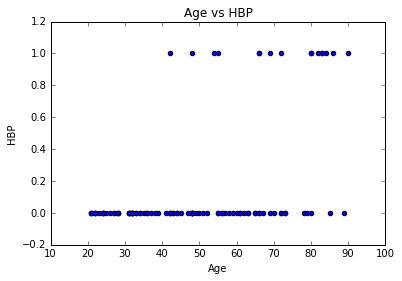

In [41]:
plt.scatter(total_data[:100, 0], total_data[:100, -1])
plt.title('Age vs HBP')
plt.ylabel('HBP')
plt.xlabel('Age')
plt.show()

In [45]:
x_train[:, 0]

array([ 32.,  29.,  24., ...,  68.,  31.,  87.])

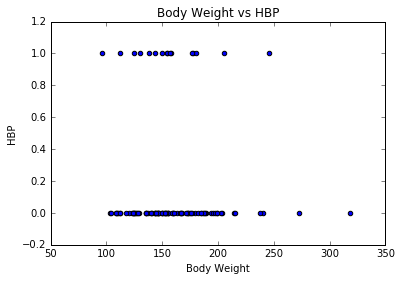

In [35]:
plt.scatter(total_data[:100, 2], total_data[:100, -1])
plt.title('Body Weight vs HBP')
plt.ylabel('HBP')
plt.xlabel('Body Weight')
plt.show()

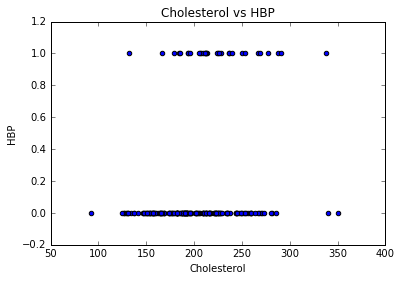

In [36]:
plt.scatter(total_data[:200, 6], total_data[:200, -1])
plt.title('Cholesterol vs HBP')
plt.ylabel('HBP')
plt.xlabel('Cholesterol')
plt.show()

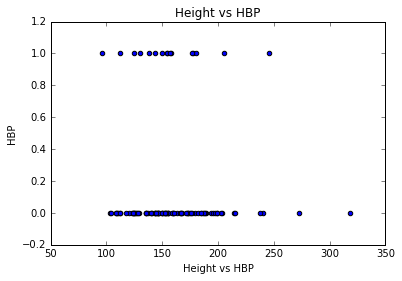

In [37]:
plt.scatter(total_data[:100, 2], total_data[:100, -1])
plt.title('Height vs HBP')
plt.ylabel('HBP')
plt.xlabel('Height vs HBP')
plt.show()

In [38]:
df[df['avg_diastolic_bp'] > 90]

,id,pseudo_psu,pseudo_stratum,stat_weight,age,sex,race,body_weight,height,avg_systolic_bp,avg_diastolic_bp,smoked_alot,currently_smokes,smoking,serum_cholesterol,hbp
14,55,2,44,804.03,48,1,1,245.6,68.0,155,91,1,1,3,212.000000,1
45,130,1,21,4743.03,55,1,2,180.0,61.4,151,96,2,NaN,1,194.000000,1
49,145,1,23,13427.95,55,1,1,167.0,67.4,137,94,1,2,2,216.000000,0
93,257,1,6,30948.75,54,0,1,157.0,65.8,156,94,1,2,2,269.000000,1
96,263,1,29,21522.22,31,1,1,167.2,68.5,129,91,1,2,2,209.000000,0
135,376,2,39,398.62,65,1,1,182.1,64.8,157,93,1,1,3,291.000000,1
171,470,1,48,1577.03,43,1,1,170.8,64.4,157,101,1,1,3,228.000000,1
200,532,1,14,2341.62,35,0,2,215.3,63.1,133,97,1,2,2,241.000000,0
201,535,1,23,12844.85,58,1,1,215.1,72.4,170,111,1,2,2,176.000000,1
209,550,1,3,2427.77,67,1,2,155.8,72.6,172,96,1,1,3,187.000000,1


In [39]:
total_data[:, 1]


array([ 1.,  0.,  0., ...,  1.,  0.,  1.])

<h3>Gaussian Naive Bayes</h3>

In [40]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [41]:
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
target_names = ['No HBP', 'HBP']
classification_report(y_test, y_pred, target_names=target_names)

0.791992882562


'             precision    recall  f1-score   support\n\n     No HBP       0.86      0.88      0.87      4501\n        HBP       0.48      0.43      0.45      1119\n\navg / total       0.78      0.79      0.79      5620\n'

Prediction seems to be below 50%

<h3>Logistic Regression</h3>

In [42]:
from sklearn.linear_model import LogisticRegression
y_pred = LogisticRegression().fit(x_train, y_train).predict(x_test)

In [43]:
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.798398576512


'             precision    recall  f1-score   support\n\n     No HBP       0.84      0.93      0.88      4501\n        HBP       0.49      0.29      0.36      1119\n\navg / total       0.77      0.80      0.78      5620\n'

Recall is much worse than above, many more false negatives

<h3>Random Forest</h3>

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [45]:
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.798754448399


'             precision    recall  f1-score   support\n\n     No HBP       0.84      0.93      0.88      4501\n        HBP       0.49      0.28      0.35      1119\n\navg / total       0.77      0.80      0.78      5620\n'

Recall seems poor here as well

<h3>Support Vector Machines</h3>

In [46]:
from sklearn.svm import SVC
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [47]:
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.801067615658


'             precision    recall  f1-score   support\n\n     No HBP       0.80      1.00      0.89      4501\n        HBP       0.53      0.01      0.02      1119\n\navg / total       0.75      0.80      0.72      5620\n'

Recall is HORRENDOUS

In [48]:
clf = SVC(C=4.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=1, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.796797153025


'             precision    recall  f1-score   support\n\n     No HBP       0.81      0.98      0.89      4501\n        HBP       0.41      0.05      0.09      1119\n\navg / total       0.73      0.80      0.73      5620\n'

In [49]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.800889679715


C:\Users\vincent\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n     No HBP       0.80      1.00      0.89      4501\n        HBP       0.00      0.00      0.00      1119\n\navg / total       0.64      0.80      0.71      5620\n'

In [50]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=1, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.800889679715


'             precision    recall  f1-score   support\n\n     No HBP       0.80      1.00      0.89      4501\n        HBP       0.00      0.00      0.00      1119\n\navg / total       0.64      0.80      0.71      5620\n'

In [51]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=1, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.800889679715


'             precision    recall  f1-score   support\n\n     No HBP       0.80      1.00      0.89      4501\n        HBP       0.00      0.00      0.00      1119\n\navg / total       0.64      0.80      0.71      5620\n'

In [52]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred, target_names=target_names)

0.799110320285


'             precision    recall  f1-score   support\n\n     No HBP       0.83      0.94      0.88      4501\n        HBP       0.49      0.24      0.32      1119\n\navg / total       0.76      0.80      0.77      5620\n'

SVMs seem like a poor choice